In [1]:
# Prac-1 Data Discretization
import numpy as np
import pandas as pd
np.random.seed(123)
x=np.random.randint(low=25, high=200, size=10)
x=np.sort(x)
print(x)
arr=np.array([42,82,91,108,121,123,131,134,148,151])
np.digitize(x,bins=[50])
arr=np.array([0,1,1,1,1,1,1,1,1,1])
np.digitize(x,[50,100])
arr=np.array([0,1,1,2,2,2,2,2,2,2])
np.digitize(x,[100,200])
arr=np.array([1,2,2,3,3,3,3,3,3,3])
df=pd.DataFrame({"height":x})
df.head()
df['binned']=pd.cut(x=df['height'], bins=[0,25,50,100,200])
df.head()
df['height_bin']=pd.cut(x=df['height'],bins=[0,25,50,100,200],labels=[0,1,2,3])
df['height_bin']=pd.cut(x=df['height'],bins=[0,25,50,100,200],labels=["very short","short","medium","tall"])
print(df.head())

[ 42  82  91 108 121 123 131 134 148 151]
   height      binned height_bin
0      42    (25, 50]      short
1      82   (50, 100]     medium
2      91   (50, 100]     medium
3     108  (100, 200]       tall
4     121  (100, 200]       tall


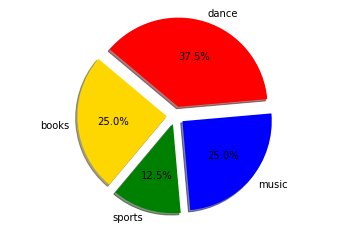

In [9]:
# Prac-1 Data Visualisation
import matplotlib.pyplot as plt
labels='books', 'sports', 'music', 'dance'
colors= ['gold','green','blue','red']
sizes=[120,60,120,180]
explode=(0.1,0.1,0.1,0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [14]:
# Prac-4 Naive-Bayes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset=pd.read_csv(r"C:\Users\prath\Downloads\8836201-6f9306ad21398ea43cba4f7d537619d0e07d5ae3\iris.csv")
X= dataset.iloc[:,[2,3]].values
y= dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=0)
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy Score:", ac)
print(cm)

Accuracy Score: 1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


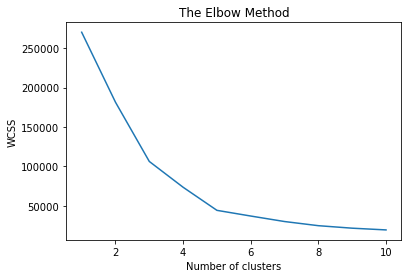

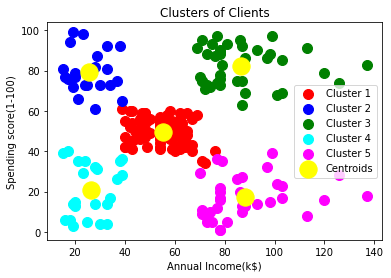

In [20]:
# Prac-6 Clustering Algorithm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset=pd.read_csv(r"C:\Users\prath\Downloads\archive\Mall_Customers.csv")
X=dataset.iloc[:,[3,4]].values

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans=KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1],s=100, c='red',label='Cluster 1')

plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1],s=100, c='blue',label='Cluster 2')

plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1],s=100, c='green',label='Cluster 3')

plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1],s=100, c='cyan',label='Cluster 4')

plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1],s=100, c='magenta',label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=300,c='yellow', label='Centroids')

plt.title('Clusters of Clients')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending score(1-100)')
plt.legend()
plt.show()

{'A': 0.387789442707259, 'B': 0.21481051315058508, 'C': 0.3974000441421556}


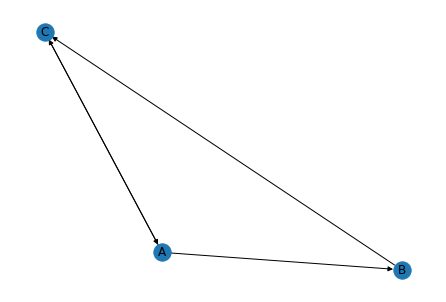

In [26]:
# Prac-9 Page Rank
import networkx as nx
import pylab as plt

D=nx.DiGraph()

D.add_weighted_edges_from([('A','B',1),('A','C',1),('C','A',1),('B','C',1)])

print(nx.pagerank(D))

nx.draw(D, with_labels=True)
plt.show()


